# 방범용 CCTV 위치와 인구 데이터 분석
- https://data.busan.go.kr/bdip/opendata/detail.do?publicdatapk=15082060&searchKeyword=%EB%B0%A9%EB%B2%94%EC%9A%A9%20cctv&searchOption=OR&from=dsh&uuid=6aa437ee-7f4f-45a4-84b9-841b401e92e2#n
- 파일데이터 csv로 다운로드
- cctv 수와 인구대비 cctv 비율 파악
- 인구대비 cctv의 평균치를 확인하고 그로부터 cctv가 과하게 부족한 구를 확인

In [1]:
!pwd

/home/jovyan/data


In [46]:
import pandas as pd
file_path = "./ref/부산광역시방범용CCTV 정보20230622.csv"
CCTV = pd.read_csv(file_path, encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
4655,부산_13_253_해양로89_월드씨포트부두_입구,"10.1.11.223:0:0:0:0:0:0,10.1.11.223:9400:",영도-13차
4816,부산_5_0103_유림노르웨이숲밑화장실_동삼동681-6,"10.1.10.123:0:0:0:0:0:0,10.1.10.123:9400:",영도-5차
5729,(2018_어린이)_우2동_1025-11_해림초교_고1,"10.1.11.213:0:0:0:0:0:0,10.1.11.213:9400:",해운대-11차


In [47]:
# cctv.columns = ["x", "xx", "local"]
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [4]:
# 방법1
cctv = cctv.apply(lambda x : x.split("-")[0])

# 방법2
# local_list = []
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv = pd.Series(local_list)

# 방법3
# cctv = cctv.str.extract(r"(\D+)-")[0]

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [5]:
cctv.sample(3)

,local,count
8,연제,377
11,강서,352
3,동래,404


<strong>행정동별 연령별 인구현황</strong>
- https://jumin.mois.go.kr/ageStatMonth.do
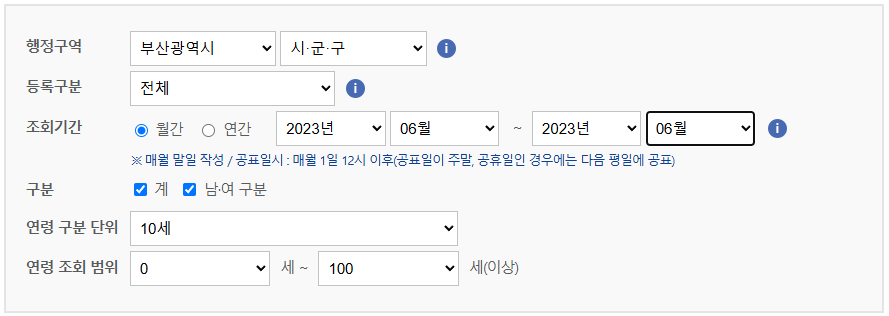

In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)  # 경고창 무시
file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2, sheet_name="연령별인구현황", skiprows=3)
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [7]:
data = ori[["행정기관", "총 인구수"]]
data.columns = ["local", "population"]
data = data.loc[1:]
data["local"] = data["local"].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True)  # drop=True는 기존 인덱스를 삭제하고 새로 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# cctv = cctv.sort_values(by="local", ascending=True)
# data = data.sort_values(by="local", ascending=True)
# 방법 1
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)
# 방법 2
# total = total.drop(total.columns[2],axis=1) # 이름이 같을경우 인덱스가 사용안됨.
# total

In [9]:
data['local'] = data['local'].apply(lambda x: x.replace('부산진구 ', '진구').replace('구 ', '').replace('군 ', '') if len(x)>3 else x)
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [10]:
# 공백 조심
# data["local"] = data["local"].apply(lambda x: len(x))
data["local"] = data["local"].apply(lambda x: x.replace("구", "").replace("군","").replace("부산진", "진구 ") if len(x.strip())>2 else x)
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [26]:
total = pd.merge(cctv, data, on="local")
total["population"] = total["population"].str.replace(",", "").astype(int)
total.sort_values(by="population", ascending=False)
total = total.set_index("local")
total

,count,population
local,,
사하,431,300922
사상,422,203029
해운대,418,383355
동래,404,272590
금정,403,218711
북구,403,276684
영도,381,107006
연제,377,202919
동구,374,86809


In [12]:
# os에 있는 사용가능한 폰트 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Oblique.otf',
 '/usr/share/fonts/opentype/urw-base35/P052-Bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans8-oblique.otf',
 '/usr/share/fonts/opentype/urw-base35/C059-Roman.otf',
 '/usr/share/fonts/opentype/urw-base35/StandardSymbolsPS.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromandunh10-oblique.otf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono12-regular.otf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/opentype/urw-base35/Z003-MediumItalic.otf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromanslant10-bold.otf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsan

Text(0.2, 0.4, '한글')

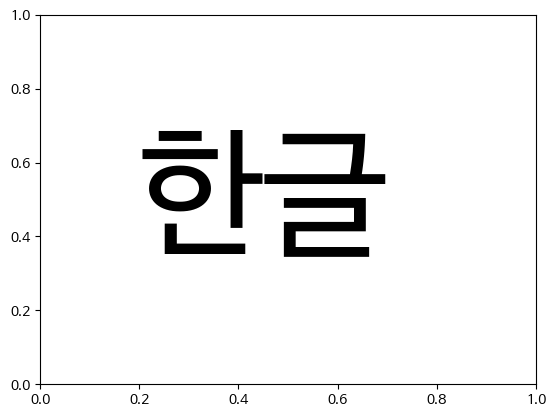

In [13]:
# 리눅스용 폰트 경로 설정
plt.rc('font', family="NanumBarunGothic")
plt.text(0.2, 0.4, "한글", size=100)

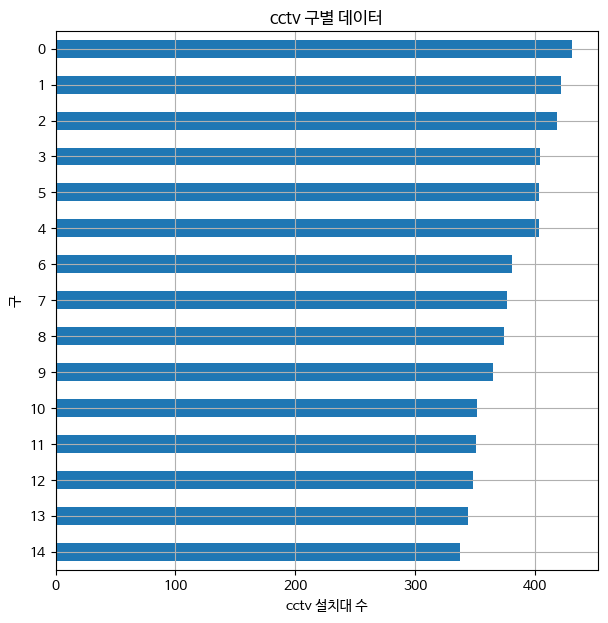

In [14]:
# plt.figure()
total["count"].sort_values().plot(kind="barh", grid=True, figsize=(7,7), ylabel="구")
plt.title("cctv 구별 데이터")
plt.xlabel("cctv 설치대 수")
plt.show()

[]

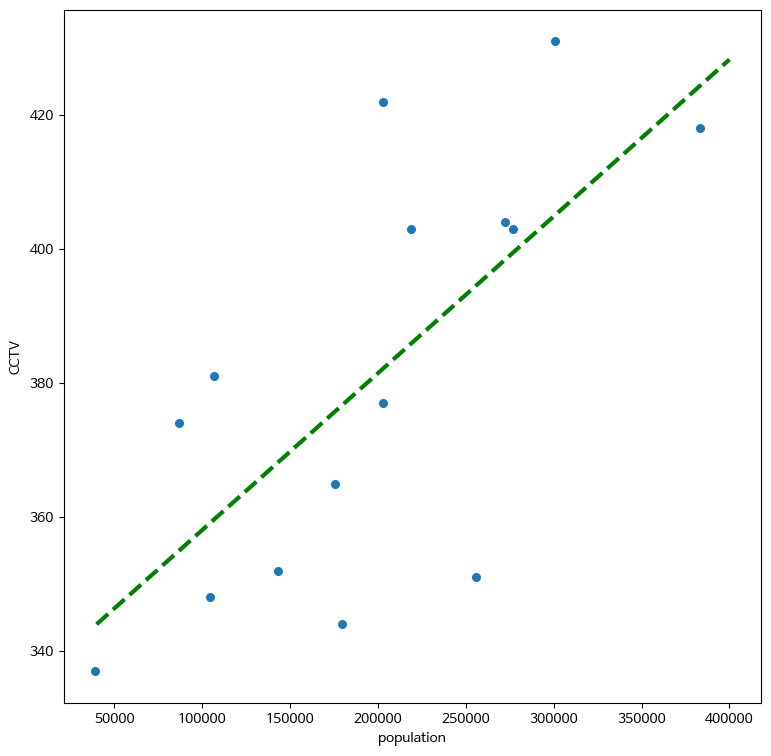

In [15]:
import numpy as np
fp1 = np.polyfit(total["population"], total["count"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)
plt.figure(figsize=(9,9))
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
plt.scatter(total["population"], total["count"], s=30)
plt.xlabel("population")
plt.ylabel("CCTV")
plt.plot()

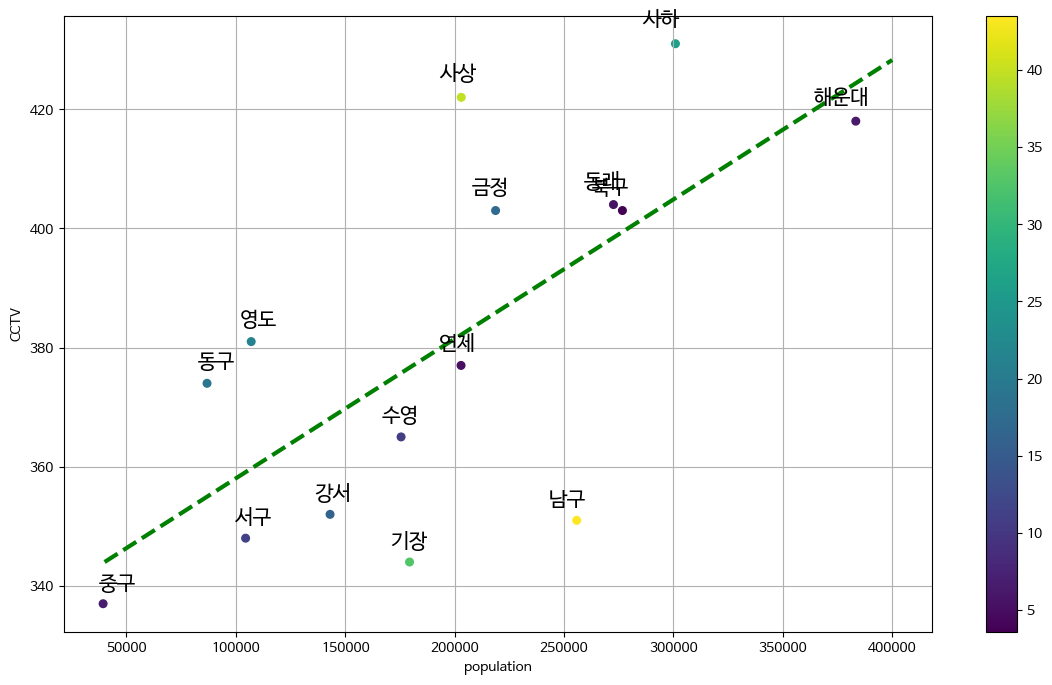

In [30]:
import numpy as np
fp1 = np.polyfit(total["population"], total["count"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)
plt.figure(figsize=(14,8))
plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total["population"], total["count"], s=30, c=total["err"])
plt.xlabel("population")
plt.ylabel("CCTV")
plt.plot()

# 점마다 각 이름을 부여
for i in range(len(total["population"])):
    plt.text(total["population"].iloc[i]*0.95, total["count"].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.show()

## 서울 CCTV

### CCTV 설치수

In [55]:
import pandas as pd
file_path3 = "./ref/서울시자치구CCTV설치현황241231.xlsx"
CCTV2 = pd.read_excel(file_path3, sheet_name="서울시 자치구 (범죄예방 수사용) CCTV 설치현황", skiprows=2, usecols="C:M")
CCTV2.head(3)

,구분,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,계,26321.0,33013.0,40512.0,49222.0,58139.0,67281.0,74408.0,80005.0,86810.0,99758.0
1,종로구,935.0,1066.0,1225.0,1322.0,1327.0,1510.0,1573.0,1812.0,1872.0,2154.0
2,중구,363.0,565.0,838.0,1174.0,1242.0,1482.0,1911.0,2026.0,2157.0,2567.0


In [124]:
cctv2 = CCTV2[["구분","2024년"]]
cctv2.columns = ["local", "total"]
cctv2 = cctv2.drop([0,26,27],axis=0)
cctv2

,local,total
1,종로구,2154.0
2,중구,2567.0
3,용산구,3202.0
4,성동구,4084.0
5,광진구,4370.0
6,동대문구,3602.0
7,중랑구,5009.0
8,성북구,4479.0
9,강북구,3430.0
10,도봉구,2623.0


In [125]:
cctv2["total"] = cctv2["total"].astype(int)
cctv2

,local,total
1,종로구,2154
2,중구,2567
3,용산구,3202
4,성동구,4084
5,광진구,4370
6,동대문구,3602
7,중랑구,5009
8,성북구,4479
9,강북구,3430
10,도봉구,2623


### 인구

In [93]:
file_path4 = "./ref/연령별인구현황연간2020.xlsx"
seoul = pd.read_excel(file_path4, sheet_name="연령별인구현황", skiprows=3)
seoul.head()

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,1100000000,서울특별시,"9,668,465","9,668,465","623,745","781,866","1,460,411","1,475,106","1,528,182","1,523,556",...,"380,581","752,742","737,205","771,232","774,974","656,660","383,660","169,755","31,462","5,001"
1,1111000000,서울특별시 종로구,"149,384","149,384","7,527","11,013","23,416","19,943","22,231","25,459",...,"5,518","11,911","10,033","11,397","12,675","10,045","6,982","3,563",722,179
2,1114000000,서울특별시 중구,"125,240","125,240","6,836","6,773","18,586","20,107","18,011","20,702",...,"3,365","9,735","10,080","8,789","10,194","8,837","5,894","3,036",617,140
3,1117000000,서울특별시 용산구,"230,040","230,040","13,496","15,609","33,485","38,069","35,698","37,070",...,"7,677","17,560","19,037","18,169","18,726","15,080","9,802","5,353","1,124",264
4,1120000000,서울특별시 성동구,"293,556","293,556","20,449","19,815","45,043","48,905","45,020","47,248",...,"9,924","22,772","24,873","22,445","23,666","18,725","11,416","5,335",854,179


In [96]:
data2 = seoul[["행정기관", "총 인구수"]]
data2.columns = ["local", "population"]
data2 = data2.loc[1:]
data2["local"] = data2["local"].apply(lambda x: x.replace("서울특별시 ","").strip())
data2 = data2.reset_index(drop=True)  # drop=True는 기존 인덱스를 삭제하고 새로 부여
# data2 = data2.reset_index("local")
data2

,local,population
0,종로구,"149,384"
1,중구,"125,240"
2,용산구,"230,040"
3,성동구,"293,556"
4,광진구,"346,682"
5,동대문구,"342,837"
6,중랑구,"394,702"
7,성북구,"437,153"
8,강북구,"308,055"
9,도봉구,"325,257"


In [99]:
# 서울 구 별 cctv와 인구
Seoul = pd.merge(cctv2, data2, on="local")
Seoul["population"] = Seoul["population"].str.replace(",", "").astype(int)
Seoul.sort_values(by="population", ascending=False)
Seoul = Seoul.set_index("local")
Seoul

,total,population
local,,
종로구,2154,149384
중구,2567,125240
용산구,3202,230040
성동구,4084,293556
광진구,4370,346682
동대문구,3602,342837
중랑구,5009,394702
성북구,4479,437153
강북구,3430,308055


### 범죄율

In [130]:
file_path5 = "./ref/5대범죄발생현황20250307.csv"
crime = pd.read_csv(file_path5, encoding="utf-8")
crime = crime.drop(["자치구별(1)", "시점"], axis=1)
crime.columns = ["local", "type", "살인", "강도", "강간/강제추행", "절도", "폭력"]
crime = crime.drop(0, axis=0)

In [135]:
# crime[["살인", "강도"]] = crime["살인", "강도"].astype(int)
# crime = crime.astype({"살인":int, "강도":int, "강간/강제추행":int, "절도":int, "폭력":int,})

In [127]:
cr_sum = crime["살인"] + crime["강도"] + crime["강간/강제추행"] + crime["절도"] + crime["폭력"]
crime["total"] = cr_sum
crime

,local,type,살인,강도,강간/강제추행,절도,폭력,total
1,종로구,발생,9,7,192,1183,1711,9719211831711
2,종로구,검거,7,9,855,944,1528,798559441528
3,중구,발생,2,5,186,1642,1576,2518616421576
4,중구,검거,2,6,128,863,1324,261288631324
5,용산구,발생,5,6,230,1111,1617,5623011111617
6,용산구,검거,3,6,186,534,1327,361865341327
7,성동구,발생,5,3,115,1016,1223,5311510161223
8,성동구,검거,5,3,98,565,1103,53985651103
9,광진구,발생,2,4,255,1664,1676,2425516641676
10,광진구,검거,2,4,224,874,1407,242248741407


In [126]:
CR = crime.groupby("local").sum()#.reset_index(name="total")
CR

,type,살인,강도,강간/강제추행,절도,폭력
local,,,,,,
강남구,발생검거,65,1411,708627,29511491,36773111
강동구,발생검거,33,1514,188167,1640781,19421697
강북구,발생검거,98,54,159132,780490,18171625
강서구,발생검거,109,65,265222,16891070,24452087
관악구,발생검거,1212,33,403351,22291137,26142355
광진구,발생검거,22,44,255224,1664874,16761407
구로구,발생검거,66,55,197142,17631008,22041823
금천구,발생검거,44,76,11793,999553,14711310
노원구,발생검거,43,33,169148,1404646,21631781
